# Regression

## Notebook Content
[Libraries used](#Library)<br>
## Regression
[Overview](#Overview)
[Multiple Linear Regression](#Multiple-Linear-Regression)<br>
[Polynomial Regression](#Polynomial-Regression)<br>
[Quantile Regression](#Quantile-Regression)<br>
[Ridge Regression](#Ridge-Regression)<br>
[Lasso Regression](#Lasso-Regression)<br>
[Elastic Net Regression](#Elastic-Net-Regression)<br>
[Support Vector Regression](#Support-Vector-Regression)<br>
[Decision Tree - CART](#Decision-Tree---CART)<br>
[Random Forest Regression](#Random-Forest-Regression)<br>
[Gradient Boosting (GBM)](#Gradient-Descent-(GBM))<br>
[Stochastic Gradient Descent](#Stochastic-Gradient-Descent)<br>
[KNN Regressor](#KNN-Regressor)<br>
[XGB Regressor](#XGB-Regressor)<br>
[Regressors Report](#Regressors-Report)<br>
## Cross Validation
[Grid Search CV](#Grid-Search-Cross-Validation)<br>
[Random Search CV](#Random-Search-Cross-Validation)<br>

# Library

In [110]:
# #Loading required libraries
# install.packages("psych")
# install.packages("quantreg")
# install.packages("glmnet")
# install.packages("e1071")
# install.packages("caTools")
# install.packages("e1071")
# install.packages("Metrics")
# install.packages("reshape")
# install.packages("rpart")
# install.packages("rpart.plot")
# install.packages("randomForest")
# install.packages("gbm")
# install.packages("gradDescent")
# install.packages("class")
# install.packages("ggplot2")

# Overview

"In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a continues dependent variable and one or more independent variables. Following are the Regression Algorithms widely used -"

## Multiple Linear Regression
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a continues dependent variable and one or more independent variables. In this Notebook, we will briefly study what linear regression is and how it can be implemented for both two variables and multiple variables using Scikit-Learn

The dataset we will be using here can be downloaded from - https://www.kaggle.com/zaraavagyan/weathercsv/data#

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions. So our task is to predict the maximum temperature taking input feature as the minimum temperature.
The following command imports the CSV dataset: 

In [111]:
# Loading the data
winedata = read.csv('dataset/winequality-red.csv')
head(winedata)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Let's Split our dataset to train and test sets

In [112]:
# Number of rows to take in train and test
N_all = nrow(winedata)
#N_train = round(0.75*(N_all))
#N_test = N_all-N_train

N_train=sample(1:N_all,.75*N_all)
N_test=setdiff(1:N_all,N_train)

# Dividing training set and testing set
wine_train <- winedata[N_train,]
wine_test <- winedata[N_test,]

Fitting the linear regression model

In [113]:
# Fitting data to linear regression model
linear_reg <- lm(quality~.,data = wine_train)
summary(linear_reg)


Call:
lm(formula = quality ~ ., data = wine_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6941 -0.3615 -0.0538  0.4386  1.9554 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           8.695161  24.365497   0.357 0.721257    
fixed.acidity         0.032281   0.029529   1.093 0.274532    
volatile.acidity     -1.072256   0.139224  -7.702 2.82e-14 ***
citric.acid          -0.303135   0.170347  -1.780 0.075411 .  
residual.sugar        0.010359   0.017132   0.605 0.545540    
chlorides            -1.670432   0.480088  -3.479 0.000521 ***
free.sulfur.dioxide   0.004105   0.002436   1.685 0.092211 .  
total.sulfur.dioxide -0.003078   0.000846  -3.639 0.000286 ***
density              -5.055355  24.850635  -0.203 0.838834    
pH                   -0.388182   0.218650  -1.775 0.076095 .  
sulphates             0.825833   0.131606   6.275 4.89e-10 ***
alcohol               0.317767   0.030277  10.495  < 2e-16 ***
---
Signif. codes:  

Let us make predictions on our test data using the linear regression model

In [114]:
# Predict using Linear Regression Model
predictions = predict(linear_reg, wine_test)
coeff_df = data.frame(linear_reg$coefficients)
coeff_df

# Dataframe to show actual and predicted quality
df_lm  = data.frame("Actual Value" = wine_test$quality,"Predicted Values" = predictions)
head(df_lm, n = 5)


,linear_reg.coefficients
,<dbl>
(Intercept),8.695161545
fixed.acidity,0.032280793
volatile.acidity,-1.072255892
citric.acid,-0.303134801
residual.sugar,0.010358684
chlorides,-1.670432499
free.sulfur.dioxide,0.004104899
total.sulfur.dioxide,-0.003078361
density,-5.055355207


,Actual.Value,Predicted.Values
,<int>,<dbl>
10,5,5.644966
12,5,5.644966
13,5,5.127552
20,6,5.394482
24,5,5.279987


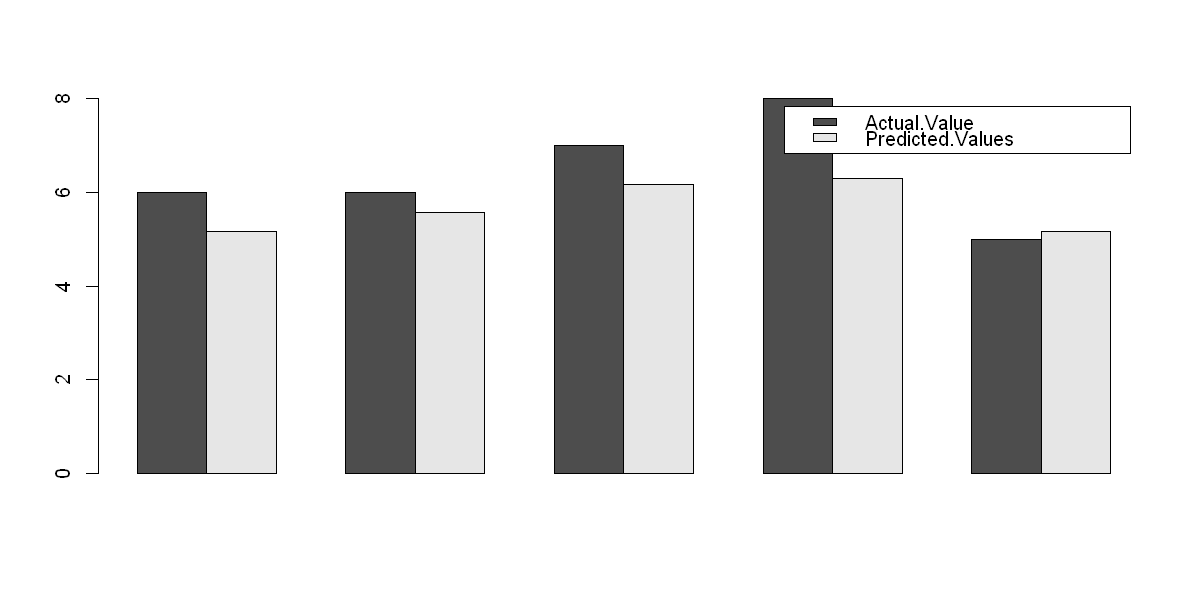

In [115]:
test2 <- rbind(df_head$Actual.Value,df_head$Predicted.Values)
as = colnames(df_head)
barplot(test2,beside=T,legend.text = as)

The RMSE, MPE and MAPE for the model are as follows:


In [116]:
# Calculate the errors
library(Metrics)
rmse_lr <- rmse(wine_test$quality,predictions)
mse_lr <- mse(wine_test$quality,predictions)
mae_lr <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_lr,2)))
print(paste("Mean Square Error: ", round(mse_lr,2)))
print(paste("Root Mean Square Error: ", round(rmse_lr,2)))

[1] "Mean Absolute Error:  0.53"
[1] "Mean Square Error:  0.47"
[1] "Root Mean Square Error:  0.68"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Polynomial Regression
If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.
Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.
Download Eaxample dataset from - https://media.geeksforgeeks.org/wp-content/uploads/data.csv

In [117]:
# Loading the dataset    ##Why there are only 6 rows in the dataset  
data = read.csv("dataset/data.csv")
head(data)
train = data['Temperature']
test = data['Pressure']

# Fitting the data to quadratic model
quadratic_model <-lm(data$Pressure~ data$Temperature + I(data$Temperature^2))   


# Predict using model
pred_quadratic_model = predict(quadratic_model,test )
df  = data.frame("Actual Value" = test,"Predicted Values" = pred_quadratic_model)
head(df)

summary(quadratic_model)

,sno,Temperature,Pressure
,<int>,<int>,<dbl>
1,1,0,0.0002
2,2,20,0.0012
3,3,40,0.0060
4,4,60,0.0300
5,5,80,0.0900
6,6,100,0.2700


,Pressure,Predicted.Values
,<dbl>,<dbl>
1,0.0002,0.01555
2,0.0012,-0.01731
3,0.0060,-0.01032
4,0.0300,0.03652
5,0.0900,0.12321
6,0.2700,0.24975



Call:
lm(formula = data$Pressure ~ data$Temperature + I(data$Temperature^2))

Residuals:
       1        2        3        4        5        6 
-0.01535  0.01851  0.01632 -0.00652 -0.03321  0.02025 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)            1.555e-02  2.564e-02   0.607   0.5869  
data$Temperature      -2.639e-03  1.206e-03  -2.189   0.1164  
I(data$Temperature^2)  4.981e-05  1.157e-05   4.304   0.0231 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02828 on 3 degrees of freedom
Multiple R-squared:  0.9568,	Adjusted R-squared:  0.9281 
F-statistic: 33.26 on 2 and 3 DF,  p-value: 0.008965


In [118]:
# Calculate the errors
library(Metrics)    #Don't Load it again
rmse_pr <- rmse(test$Pressure,pred_quadratic_model)
mse_pr <- mse(test$Pressure,pred_quadratic_model)
mae_pr <- mae(test$Pressure,pred_quadratic_model)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_pr,2)))
print(paste("Mean Square Error: ", round(mse_pr,2)))
print(paste("Root Mean Square Error: ", round(rmse_pr,2)))

[1] "Mean Absolute Error:  0.02"
[1] "Mean Square Error:  0"
[1] "Root Mean Square Error:  0.02"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Quantile Regression
Quantile regression is the extension of linear regression and we generally use it when outliers, high skeweness and heteroscedasticity exist in the data.   __This needs to be more elaborative__

In [119]:
# Loading Required libraries
library(quantreg)
options(warn=-1)

# Loading the dataset
engel = read.csv("dataset/engel.csv")
head(engel)

# Fitting the datat to quantile regression
quantile_reg <- rq( foodexp~ income, data = engel)
summary(quantile_reg)

,X,income,foodexp
,<int>,<dbl>,<dbl>
1,0,420.1577,255.8394
2,1,541.4117,310.9587
3,2,901.1575,485.6800
4,3,639.0802,402.9974
5,4,750.8756,495.5608
6,5,945.7989,633.7978



Call: rq(formula = foodexp ~ income, data = engel)

tau: [1] 0.5

Coefficients:
            coefficients lower bd  upper bd 
(Intercept)  81.48225     53.25915 114.01156
income        0.56018      0.48702   0.60199

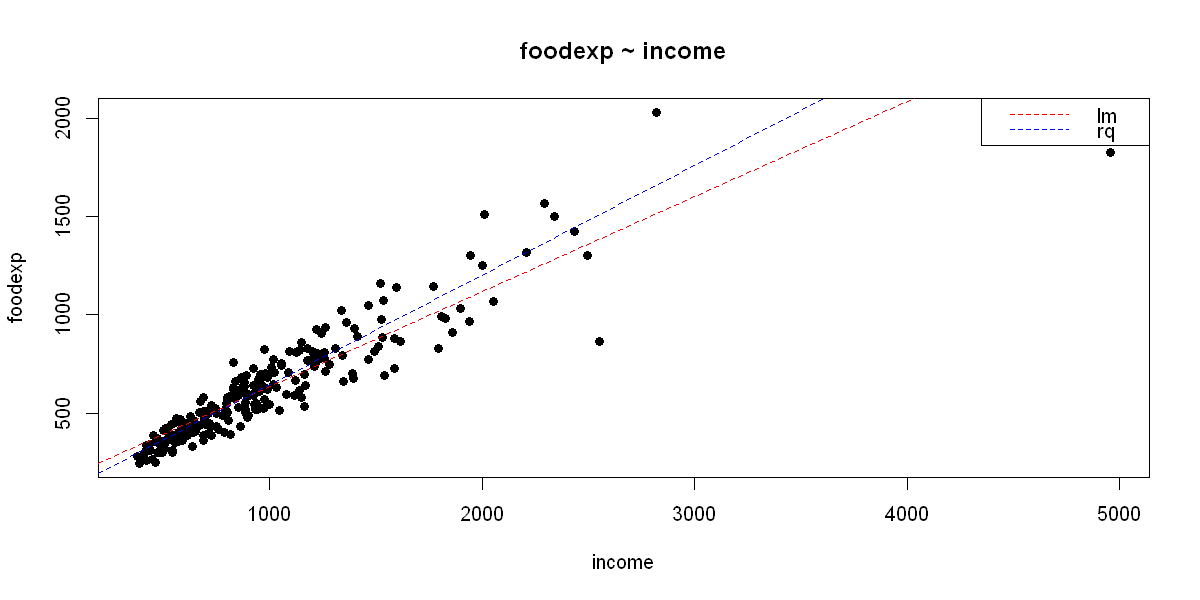

In [120]:
plot(foodexp ~ income, data = engel, pch = 16, main = "foodexp ~ income")
abline(lm(foodexp ~ income, data = engel), col = "red", lty = 2)
abline(rq(foodexp ~ income, data = engel), col = "blue", lty = 2)
legend("topright", legend = c("lm", "rq"), col = c("red", "blue"), lty = 2)

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Ridge Regression
Ridge Regression is particularly useful to mitigate the problem of multicollinearity in linear regression,
which commonly occurs in models with large numbers of parameters.
Removing predictors from the model can be seen as settings their coefficients to zero.
Instead of forcing them to be exactly zero, let's penalize them if they are too far from zero,
thus enforcing them to be small in a continuous way.
This way, we decrease model complexity while keeping all variables in the model.
It applies L2 Regularization


In [121]:
# Loading required libraries
library(glmnet)

# Setting alpha = 0 implements ridge regression
lambdas_to_try <- 0.01
ridge <- glmnet(as.matrix(wine_train), wine_train$quality, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE)

In [122]:
# Predict using model
predictions <- predict(ridge, lambdas_to_try, newx = as.matrix(wine_test))
df  = data.frame("Actual Value" = wine_test$quality,"Predicted Values" = predictions)
head(df)

,Actual.Value,X1
,<int>,<dbl>
10,5,5.012410
12,5,5.012410
13,5,5.002032
20,6,5.988535
24,5,5.005399
25,6,5.991057


In [165]:
# Calculate the errors
library(Metrics)
rmse_rr <- rmse(wine_test$quality,predictions)
mse_rr <- mse(wine_test$quality,predictions)
mae_rr <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_rr,2)))
print(paste("Mean Square Error: ", round(mse_rr,2)))
print(paste("Root Mean Square Error: ", round(rmse_rr,2)))

[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Lasso Regression
Lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces
Here the lambda value is 0.01

In [124]:
# Loading required libraries
library(glmnet)

# Setting alpha = 0 implements ridge regression
lambdas_to_try <- 0.01
lasso <- glmnet(as.matrix(wine_train), wine_train$quality, alpha = 1, lambda = lambdas_to_try,
                standardize = TRUE)

In [125]:
# Predict using model
predictions <- predict(lasso, lambdas_to_try, newx = as.matrix(wine_test))
df  = data.frame("Actual Value" = wine_test$quality,"Predicted Values" = predictions)
head(df)

,Actual.Value,X1
,<int>,<dbl>
10,5,5.008063
12,5,5.008063
13,5,5.008063
20,6,5.995557
24,5,5.008063
25,6,5.995557


In [168]:
# Calculate the errors
library(Metrics)
rmse_lasso <- rmse(wine_test$quality,predictions)
mse_lasso <- mse(wine_test$quality,predictions)
mae_lasso <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_lasso,2)))
print(paste("Mean Square Error: ", round(mse_lasso,2)))
print(paste("Root Mean Square Error: ", round(rmse_lasso,2)))



[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Elastic Net Regression
ElasticNet Regression is regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

In [127]:
# install glmnet library 
lambdas_to_try <- 0.03
# Splitting the data into test and train
# Setting alpha = it can be any value between 0 & 1 
elastic_net <- glmnet(as.matrix(wine_train),wine_train$quality, alpha = 0.4, lambda = lambdas_to_try,
                standardize = TRUE)

In [128]:
# Predict using elastic net
predictions <- predict(elastic_net, lambdas_to_try, newx = as.matrix(wine_test))
df  = data.frame("Actual Value" = wine_test$quality,"Predicted Values" = predictions)
head(df)

,Actual.Value,X1
,<int>,<dbl>
10,5,5.025245
12,5,5.025245
13,5,5.023320
20,6,5.982328
24,5,5.021716
25,6,5.983932


In [169]:
# Calculate the errors
library(Metrics)
rmse_en <- rmse(wine_test$quality,predictions)
mse_en <- mse(wine_test$quality,predictions)
mae_en <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_en,2)))
print(paste("Mean Square Error: ", round(mse_en,2)))
print(paste("Root Mean Square Error: ", round(rmse_en,2)))


[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Support Vector Regression
Support vector regression can solve both linear and non-linear models. SVM uses different kernel functions (such as linear,polynomial,radial basis,sigmoid ) to find the optimal solution for non-linear models.
SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important. (This is often called whitening, although there are different types of whitening.) You want to make sure that for each dimension, the values are scaled to lie roughly within this range. Otherwise, if e.g. dimension 1 is from 0-1000 and dimension 2 is from 0-1.2, then dimension 1 becomes much more important than dimension 2, which will skew results.
    
    

In [130]:
# required libraries
library(e1071)
library(caTools)

# Fitting the model
SVM = svm(as.matrix(wine_train), y =wine_train$quality ,kernel = 'linear')  

In [131]:
# Predict using the model
predictions = predict(SVM, as.matrix(wine_test))
df  = data.frame("Actual Value" = wine_test$quality,"Predicted Values" = predictions)
head(df)

,Actual.Value,Predicted.Values
,<int>,<dbl>
10,5,5.021103
12,5,5.021103
13,5,4.995930
20,6,5.988695
24,5,5.024304
25,6,5.965476


In [170]:
# Calculate the errors
library(Metrics)
rmse_svm <- rmse(wine_test$quality,predictions)
mse_svm <- mse(wine_test$quality,predictions)
mae_svm <- mae(wine_test$quality,predictions)

# Print scores

print(paste("Mean Absolute Error: ", round(mae_svm,2)))
print(paste("Mean Square Error: ", round(mse_svm,2)))
print(paste("Root Mean Square Error: ", round(rmse_svm,2)))

[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Decision Tree - CART 
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Let’s see the Step-by-Step implementation –

In [133]:
# Required library
library(rpart)

#Creating regressor object and fitting with X and Y data
decision_tree = rpart(quality~., data=wine_test)
summary(decision_tree)

Call:
rpart(formula = quality ~ ., data = wine_test)
  n= 400 

           CP nsplit rel error    xerror       xstd
1  0.17062842      0 1.0000000 1.0091300 0.07173145
2  0.09876073      1 0.8293716 0.9495460 0.07538482
3  0.03659812      2 0.7306108 0.8481914 0.06759793
4  0.03268095      3 0.6940127 0.8558523 0.06968053
5  0.02875098      4 0.6613318 0.8593629 0.07029898
6  0.02320904      5 0.6325808 0.8496688 0.07074195
7  0.01855050      6 0.6093718 0.8292981 0.06981687
8  0.01723007      7 0.5908213 0.8236812 0.07035636
9  0.01393212      8 0.5735912 0.8355560 0.07090740
10 0.01259060      9 0.5596591 0.8433696 0.07130243
11 0.01168732     10 0.5470685 0.8591997 0.07266491
12 0.01158693     12 0.5236938 0.8607596 0.07270697
13 0.01000000     13 0.5121069 0.8451087 0.07253793

Variable importance
             alcohol     volatile.acidity              density 
                  24                   16                   12 
       fixed.acidity            sulphates            chlori

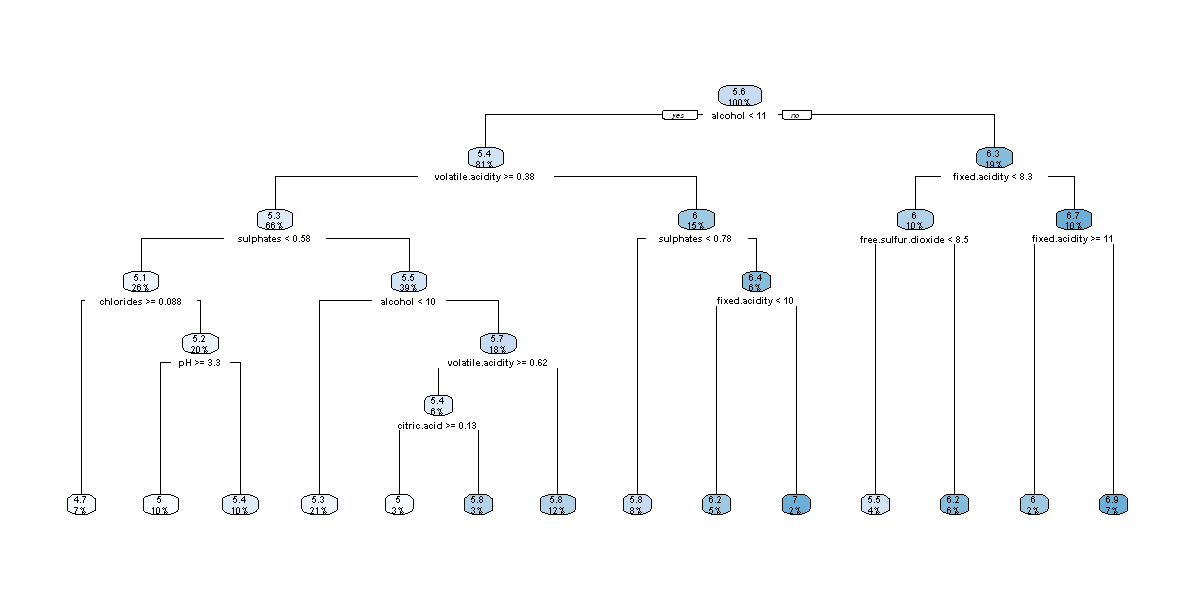

In [134]:
#We can plot and see the decision tree as below.
library(rpart.plot)

rpart.plot(decision_tree)

In [207]:
# Predicting using the model
predictions <- predict(decision_tree,newdata=wine_test)[1:N_test]   

In [208]:
# Calculate the errors
library(Metrics)
rmse_dt <- rmse(wine_test$quality,predictions)
mse_dt <- mse(wine_test$quality,predictions)
mae_dt <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_dt,2)))
print(paste("Mean Square Error: ", round(mse_dt,2)))
print(paste("Root Mean Square Error: ", round(rmse_dt,2)))

[1] "Mean Absolute Error:  0.79"
[1] "Mean Square Error:  0.98"
[1] "Root Mean Square Error:  0.99"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Random Forest Regression
Random Forest is a collection of decision trees and average/majority vote of the forest is selected as the predicted output.

We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data.

In [137]:
# Required libraries
library(randomForest)

# Fitting the model
rf <- randomForest(quality ~ ., data = wine_train, ntree=100)   
summary(rf)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1199   -none- numeric  
mse              100   -none- numeric  
rsq              100   -none- numeric  
oob.times       1199   -none- numeric  
importance        11   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1199   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [138]:
# Predicting using the model
predictions <- predict(rf,newdata=wine_test)[1:N_test]

In [173]:
# Calculate the errors
library(Metrics)
rmse_rf <- rmse(wine_test$quality,predictions)
mse_rf <- mse(wine_test$quality,predictions)
mae_rf <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_rf,2)))
print(paste("Mean Square Error: ", round(mse_rf,2)))
print(paste("Root Mean Square Error: ", round(rmse_rf,2)))

[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Gradient Boosting Machine

In gradient boosting, the ensemble model we try to build is also a weighted sum of weak learners

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is followed for a classification problem while a similar technique is used for regression.

,var,rel.inf
,<fct>,<dbl>
alcohol,alcohol,54.3732559
sulphates,sulphates,20.1286166
volatile.acidity,volatile.acidity,16.6958670
total.sulfur.dioxide,total.sulfur.dioxide,3.5694214
chlorides,chlorides,1.5009597
pH,pH,1.1958543
free.sulfur.dioxide,free.sulfur.dioxide,0.5935582
fixed.acidity,fixed.acidity,0.5384384
density,density,0.5186587


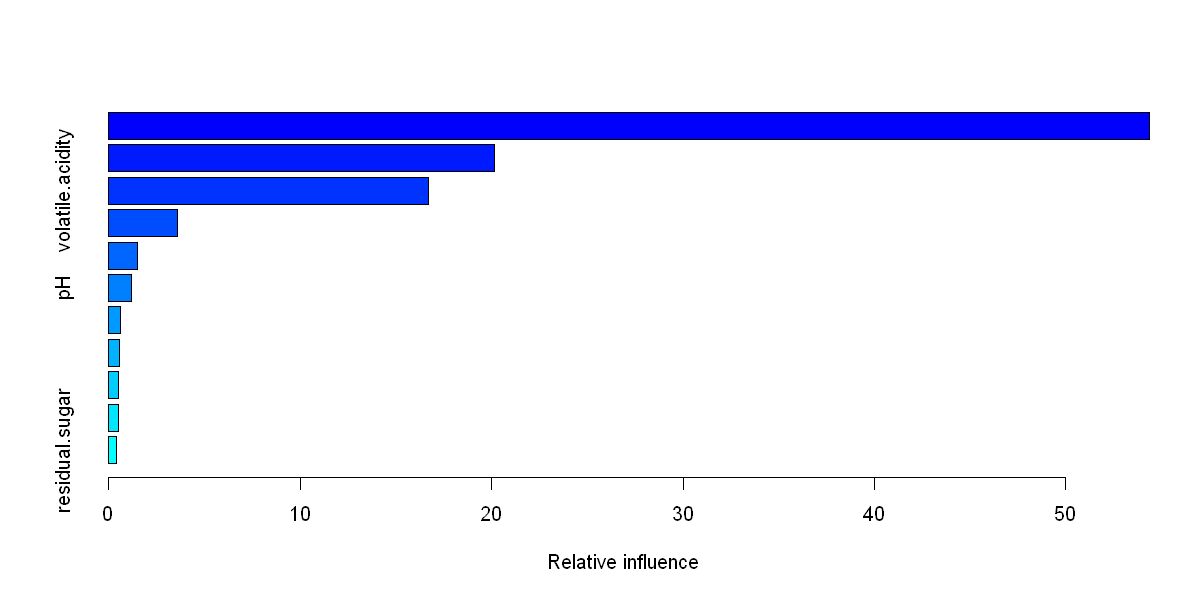

In [140]:
# Required libraries
library(gbm)

# Fitting the model
gb <- gbm(quality ~ ., data = wine_train, distribution = "gaussian", shrinkage = 0.01, interaction.depth = 4)
summary(gb)

In [141]:
#Predict using model
predictions <- predict.gbm(gb, wine_test, n.trees = 100)

In [174]:
# Calculate the errors
library(Metrics)
rmse_gbm <- rmse(wine_test$quality,predictions)
mse_gbm <- mse(wine_test$quality,predictions)
mae_gbm <- mae(wine_test$quality,predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_gbm,2)))
print(paste("Mean Square Error: ", round(mse_gbm,2)))
print(paste("Root Mean Square Error: ", round(rmse_gbm,2)))

[1] "Mean Absolute Error:  0.72"
[1] "Mean Square Error:  0.81"
[1] "Root Mean Square Error:  0.9"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Gradient Descent (GBM)

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

In [178]:
# Loading required libraries
library(gradDescent)

#winedata is scaled and then split
featureScalingResult <- varianceScaling(winedata)
splitedDataset <- splitData(featureScalingResult$scaledDataSet)

# # Fit the train from splitted dataset data to GD model
model <- GD(splitedDataset$dataTrain)

In [191]:
# Test data input
dataTestInput <- (splitedDataset$dataTest)[,1:(ncol(splitedDataset$dataTest)-1)]

# Predict using model
predictions <- prediction(model, dataTestInput)

In [192]:
# Calculating errors
library(Metrics)
rmse_gd <- rmse(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])
mae_gd <- mae(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])
mse_gd <- mse(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])

# Print scores
print(paste("Mean Absolute Error: ", mae_gd))
print(paste("Mean Square Error: ", mse_gd))
print(paste("Root Mean Square Error: ", rmse_gd))

[1] "Mean Absolute Error:  0.791272754541309"
[1] "Mean Square Error:  1.1116292980384"
[1] "Root Mean Square Error:  1.05433832237968"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) regressor basically implements a plain SGD learning routine supporting various loss functions and penalties to fit linear regression models.

In [146]:
# Fitting the model
SGDmodel <- SGD(splitedDataset$dataTrain)

#show result
print(SGDmodel)

          [,1]      [,2]       [,3]      [,4]        [,5]      [,6]       [,7]
[1,] 0.3876573 0.4291433 -0.2580326 0.9828201 0.001271909 0.7428889 -0.2227534
          [,8]      [,9]       [,10]     [,11]     [,12]
[1,] 0.4159231 0.2981105 -0.02304137 0.2418506 0.5050303


In [147]:
# Test data input
dataTestInput <- (splitedDataset$dataTest)[,1:ncol(splitedDataset$dataTest)-1]

# Predict using model
predictions <- prediction(model, dataTestInput)

In [193]:
# Calculating errors
library(Metrics)
rmse_sgd <- rmse(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])
mae_sgd <- mae(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])
mse_sgd <- mse(splitedDataset$dataTest[,ncol(splitedDataset$dataTest)],predictions[,ncol(predictions)])

# Print scores
print(paste("Mean Absolute Error: ", round(mae_sgd,2)))
print(paste("Mean Square Error: ", round(mse_sgd,2)))
print(paste("Root Mean Square Error: ", round(rmse_sgd,2)))

[1] "Mean Absolute Error:  0.79"
[1] "Mean Square Error:  1.11"
[1] "Root Mean Square Error:  1.05"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## KNN Regressor

Regression based on k-nearest neighbors.
The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.
A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.

In [194]:
# Remove the null values if any
wine_train <- na.omit(wine_train)
wine_test <- na.omit(wine_test)

#Loading required libraries
library(class)

# Fitting the model
knn_model <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k=26)

In [201]:
# Accuracy of the model
accuracy <- 100 * sum(wine_test['quality'][1:N_test,] ==
                           knn_model)/NROW(wine_test['quality'])
accuracy

[1] 48.25

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# XGB Regressor

In [202]:
# We need to pass matrix as input for xgb, hence we do the train test split again and define X and Y
data = read.csv('dataset/winequality-red.csv')
alpha=0.8
d = sort(sample(nrow(data), nrow(data)*alpha))
train = data[d,]
test = data[-d,]
X_train = as.matrix(train[,1:11])
X_test = as.matrix(test[,1:11])
y_train = train$quality
y_test = test$quality

In [203]:
# Load required libraries
library(xgboost)

#Prepare the data
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [204]:
#Fit the model
model_xgb <- xgboost(data = dtrain, # the data   
                 nround = 15, # max number of boosting iterations
                 max_depth = 3)

[1]	train-rmse:3.675007 
[2]	train-rmse:2.617607 
[3]	train-rmse:1.889074 
[4]	train-rmse:1.395113 
[5]	train-rmse:1.067960 
[6]	train-rmse:0.858540 
[7]	train-rmse:0.732016 
[8]	train-rmse:0.657595 
[9]	train-rmse:0.612948 
[10]	train-rmse:0.586373 
[11]	train-rmse:0.569531 
[12]	train-rmse:0.559085 
[13]	train-rmse:0.551950 
[14]	train-rmse:0.545688 
[15]	train-rmse:0.542357 


In [205]:
# Make predictions
predictions = predict(model_xgb, dtest)

In [206]:
# Calculating errors
library(Metrics)
rmse_xgb <- rmse(y_test, predictions)
mae_xgb <- mae(y_test, predictions)
mse_xgb <- mse(y_test, predictions)

# Print scores
print(paste("Mean Absolute Error: ", round(mae_xgb,2)))
print(paste("Mean Square Error: ", round(mse_xgb,2)))
print(paste("Root Mean Square Error: ", round(rmse_xgb,2)))

[1] "Mean Absolute Error:  0.48"
[1] "Mean Square Error:  0.39"
[1] "Root Mean Square Error:  0.62"


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Regressors Report

In [156]:
Algorithm = c('Multiple Linear Regression','Ridge Regularisation','Lasso Reguralisation',
              'Elastic net','Support Vector Regression','Decision Tree','Gradient Descent','Stochastic Gradient Descent','Random Forest', 'XGBoost')

Mean_Absolute_Error = c(mae_lr,mae_rr,mae_lasso,mae_en,mae_svm, mae_dt, mae_gd,mae_sgd,mae_rf, mae_xgb)
                      
Mean_Squared_Error = c(mse_lr,mse_rr, mse_lasso,mse_en,mse_svm, mse_dt,mae_gd,mae_sgd, mse_rf, mse_xgb)         

Root_Mean_Squared_Error = c(rmse_lr,rmse_rr, rmse_lasso,rmse_en,rmse_svm, rmse_gd,mae_sgd,mae_dt, rmse_rf, rmse_xgb)          

report = data.frame(Algorithm,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error)
report


Algorithm,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error
<fct>,<dbl>,<dbl>,<dbl>
Multiple Linear Regression,0.533237724,0.4663782949,0.68291895
Ridge Regularisation,0.010343730,0.0001743837,0.01320544
Lasso Reguralisation,0.008824855,0.0001077731,0.01038138
Elastic net,0.025867776,0.0009522315,0.03085825
Support Vector Regression,0.023676095,0.0008768431,0.02961154
Decision Tree,0.793092692,0.9754048259,1.00940175
Gradient Descent,0.770021312,0.7700213120,0.77002131
Stochastic Gradient Descent,0.770021312,0.7700213120,0.79309269
Random Forest,0.719360000,0.8136320028,0.90201552


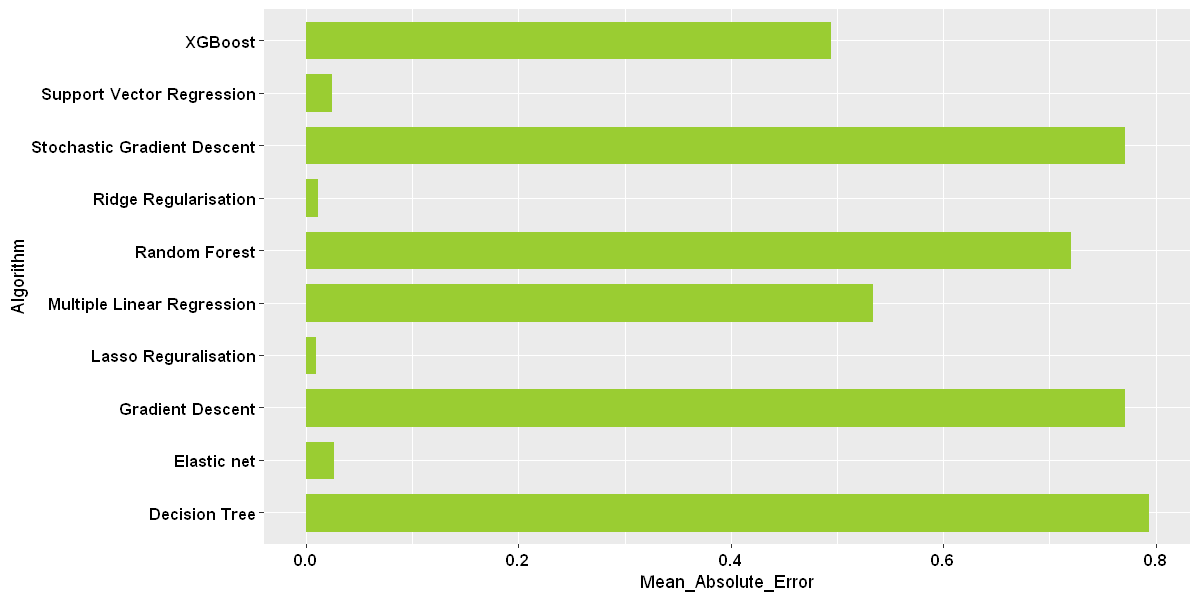

In [157]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=report, aes(x=Algorithm, y=Mean_Absolute_Error))+geom_bar(position="dodge",stat="identity",width=0.7,color="yellowgreen",fill="yellowgreen") +
  coord_flip() +theme(axis.text.x = element_text(face="bold", color="black",
                                                 size=10, angle=0),
                      axis.text.y = element_text(face="bold", color="black",
                                                 size=10, angle=0))

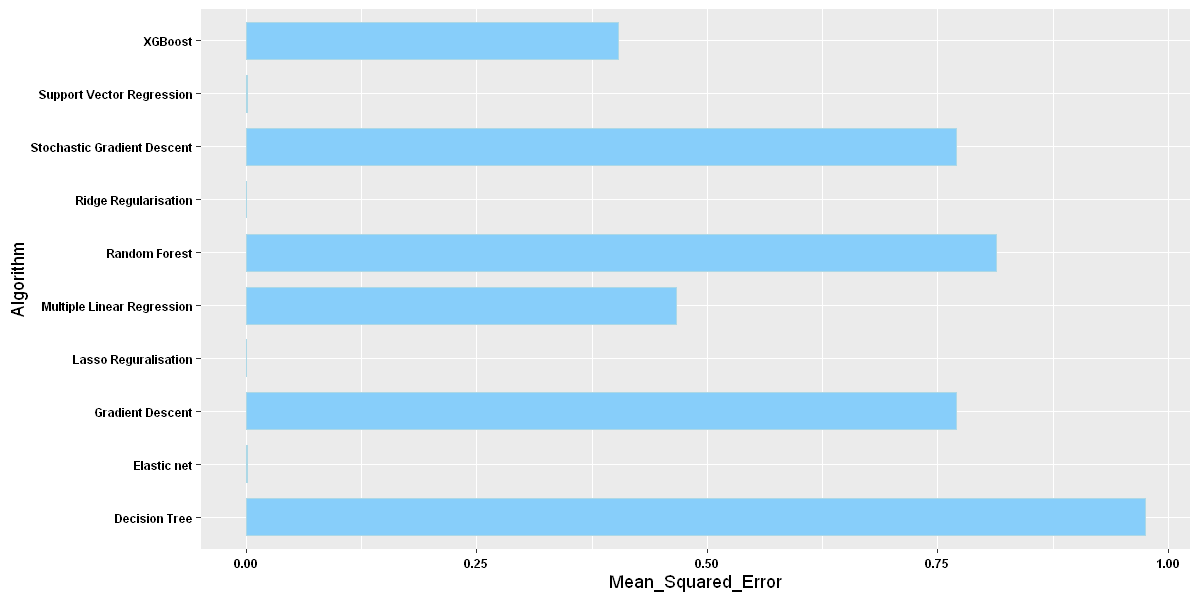

In [158]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=report, aes(x=Algorithm, y=Mean_Squared_Error))+geom_bar(position="dodge",stat="identity",width=0.7,color="lightblue",fill="lightskyblue") +
  coord_flip() +theme(axis.text.x = element_text(face="bold", color="black",
                                                 size=7, angle=0),
                      axis.text.y = element_text(face="bold", color="black",
                                                 size=7, angle=0))

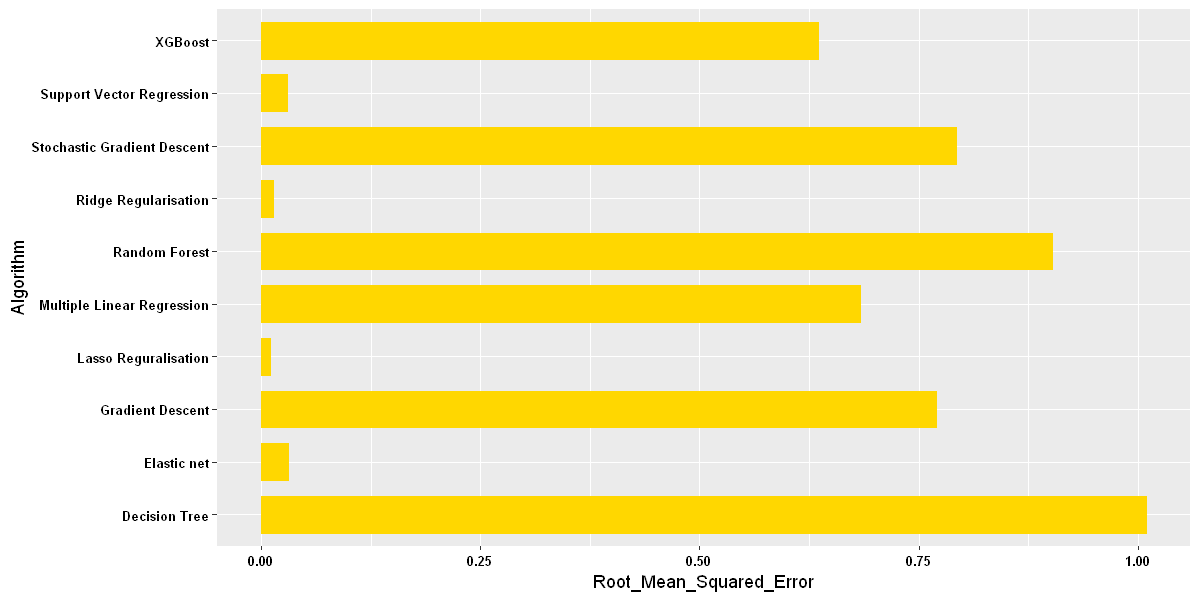

In [159]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=report, aes(x=Algorithm, y=Root_Mean_Squared_Error))+geom_bar(position="dodge",stat="identity",width=0.7,color="gold",fill="gold") +
  coord_flip() +theme(axis.text.x = element_text(face="bold", color="black",
                                                 size=8, angle=0),
                      axis.text.y = element_text(face="bold", color="black",
                                                 size=8, angle=0))

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Grid Search
Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

**Note:** Here Grid search is demonstrated for only one model but it can be replicated across all the model with changing its respective hyperparameters


**Cross Validation**<br>
The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, we make sure to split our data into a training and a testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

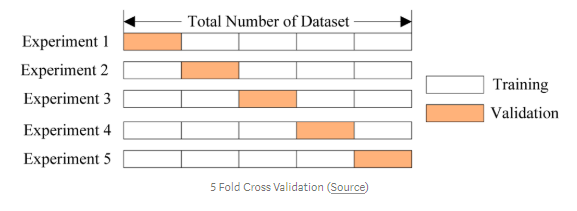

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. This sounds like an awfully tedious process! Each time we want to assess a different set of hyperparameters, we have to split our training data into K fold and train and evaluate K times. If we have 10 sets of hyperparameters and are using 5-Fold CV, that represents 50 training loops.

Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter

In [160]:
# Loading required libraries
library(randomForest)
library(mlbench)
library(caret)

In [161]:
# Parameter grid to tune
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
                        
nrow(gbmGrid)

[1] 90

### Grid Search Cross Validation

In [162]:
# Hyperparameter tuning using Grid Search
control <- trainControl(method="repeatedcv", number=3, repeats=2, search="grid")
seed <- 7
set.seed(seed)
metric <- "RMSE"
set.seed(825)
gbm_grid <- train(quality ~ ., data = wine_train, 
                 method = "gbm", 
                 trControl = control, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbm_grid

Stochastic Gradient Boosting 

1199 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 798, 801, 799, 799, 799, 800, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE       Rsquared   MAE      
  1                    50     0.6398199  0.3677149  0.5023971
  1                   100     0.6313090  0.3784887  0.4902834
  1                   150     0.6315701  0.3783206  0.4888666
  1                   200     0.6335229  0.3755945  0.4905652
  1                   250     0.6340230  0.3744474  0.4897549
  1                   300     0.6345593  0.3736941  0.4907706
  1                   350     0.6347825  0.3734800  0.4915388
  1                   400     0.6342240  0.3746369  0.4908707
  1                   450     0.6350995  0.3733186  0.4921503
  1                   500     0.6363861  0.3730019  0.4928628
  1                   550     0.6362754  0.3732484  0.4922965
  1             

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

### Random Search Cross Validation
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

In [163]:
# Hyperparameter tuning using Random Search
control <- trainControl(method="repeatedcv", number=3, repeats=2, search="random")
seed <- 7
set.seed(seed)
metric <- "RMSE"
set.seed(825)
gbm_random <- train(quality ~ ., data = wine_train, 
                 method = "gbm", 
                 trControl = control, 
                 verbose = FALSE, 
                 tuneGrid = gbmGrid)
gbm_random

Stochastic Gradient Boosting 

1199 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 798, 801, 799, 799, 799, 800, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE       Rsquared   MAE      
  1                    50     0.6398199  0.3677149  0.5023971
  1                   100     0.6313090  0.3784887  0.4902834
  1                   150     0.6315701  0.3783206  0.4888666
  1                   200     0.6335229  0.3755945  0.4905652
  1                   250     0.6340230  0.3744474  0.4897549
  1                   300     0.6345593  0.3736941  0.4907706
  1                   350     0.6347825  0.3734800  0.4915388
  1                   400     0.6342240  0.3746369  0.4908707
  1                   450     0.6350995  0.3733186  0.4921503
  1                   500     0.6363861  0.3730019  0.4928628
  1                   550     0.6362754  0.3732484  0.4922965
  1             

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Regression" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>